In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import mpl_toolkits.mplot3d.art3d as art3d
import py_gauge_mc

from tqdm.notebook import tqdm

In [2]:
def p_to_dim_dim(p):
    if p == 3:
        return 1,2,3
    if p == 4:
        return 1,3,2
    if p == 5:
        return 2,3,1
    return None


def plot_state(state, t=0, r=0):
    state = state[r]
    T = np.arange(state.shape[0])
    X = np.arange(state.shape[1])
    Y = np.arange(state.shape[2])
    Z = np.arange(state.shape[3])
    P = np.arange(state.shape[4])
    TT, XX, YY, ZZ, PP = np.meshgrid(T,X,Y,Z,P)
    indices = np.stack([TT,XX,YY,ZZ,PP], axis=-1)
    nonzero_indices = indices[state!=0,:]
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlim((0,state.shape[1]))
    ax.set_ylim((0,state.shape[2]))
    ax.set_zlim((0,state.shape[3]))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    dims = ['x', 'y', 'z']
    for (t,x,y,z,p) in indices.reshape(-1,5):
        if t != 0:
            continue
        
        pdims = p_to_dim_dim(p)
        
        if pdims is not None:
            first,second,normal = pdims
            
            zdir = dims[normal - 1]
            if zdir == "y":
                xy1, z1 = (x, z), y
            elif zdir == "x":
                xy1, z1 = (y, z), x
            else:
                xy1, z1 = (x, y), z
            
            p = Rectangle(xy1, 1, 1, color='blue', alpha=0.1 * abs(state[t,x,y,z,p]))
            ax.add_patch(p)
            art3d.pathpatch_2d_to_3d(p, z=z1, zdir=zdir)

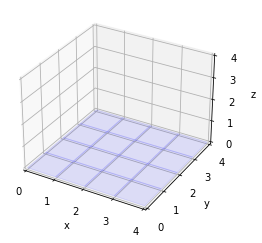

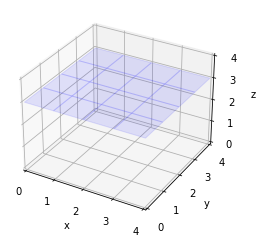

96:192	1


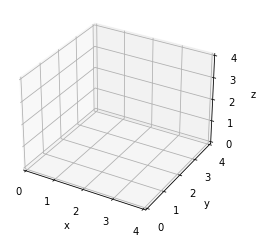

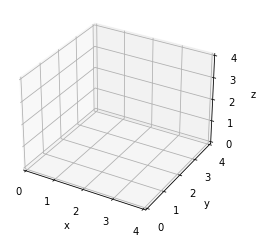

In [3]:
replicas = 2
L = 4
state = np.zeros((replicas,L,L,L,L,6), dtype=np.int32)

state[0,0,:,:,0,3] = 1

state[1,0,:,:,L-1,3] = 1

vns = [(n**2)/2.0 for n in range(30)]
graph = py_gauge_mc.GPUGaugeTheory(L,L,L,L,vns,num_replicas=replicas,initial_state=state)

plot_state(graph.get_graph_state())
plt.show()

plot_state(graph.get_graph_state(), r=1)
plt.show()

graph.run_global_update()

plot_state(graph.get_graph_state())
plt.show()

plot_state(graph.get_graph_state(), r=1)
plt.show()

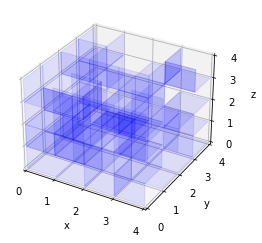

0:(0, 0, 0, 0):tx	-1
0:(0, 0, 0, 0):ty	1
0:(0, 0, 0, 0):tz	-1
0:(0, 0, 0, 0):xy	-1
0:(0, 0, 0, 0):yz	1
0:(0, 0, 0, 1):tx	1
0:(0, 0, 0, 1):tz	1
0:(0, 0, 0, 1):xy	-1
0:(0, 0, 0, 1):xz	1
0:(0, 0, 0, 1):yz	-1
0:(0, 0, 0, 2):xy	1
0:(0, 0, 0, 2):yz	1
0:(0, 0, 0, 3):tz	1
0:(0, 0, 0, 3):xy	1
0:(0, 0, 0, 3):yz	1
0:(0, 0, 1, 0):tx	1
0:(0, 0, 1, 0):ty	-3
0:(0, 0, 1, 0):tz	2
0:(0, 0, 1, 0):xy	1
0:(0, 0, 1, 0):yz	1
0:(0, 0, 1, 1):tx	-1
0:(0, 0, 1, 1):ty	1
0:(0, 0, 1, 1):tz	1
0:(0, 0, 1, 1):xy	-1
0:(0, 0, 1, 1):xz	-1
0:(0, 0, 1, 2):tx	1
0:(0, 0, 1, 2):ty	-1
0:(0, 0, 1, 2):tz	1
0:(0, 0, 1, 2):xy	1
0:(0, 0, 1, 2):xz	-2
0:(0, 0, 1, 2):yz	1
0:(0, 0, 1, 3):ty	1
0:(0, 0, 1, 3):yz	1
0:(0, 0, 2, 0):tz	-2
0:(0, 0, 2, 0):xy	1
0:(0, 0, 2, 0):xz	1
0:(0, 0, 2, 0):yz	1
0:(0, 0, 2, 1):ty	-2
0:(0, 0, 2, 1):tz	1
0:(0, 0, 2, 1):yz	-1
0:(0, 0, 2, 2):tx	-1
0:(0, 0, 2, 2):ty	1
0:(0, 0, 2, 2):yz	1
0:(0, 0, 2, 3):tz	1
0:(0, 0, 2, 3):xy	-1
0:(0, 0, 2, 3):xz	1
0:(0, 0, 2, 3):yz	-1
0:(0, 0, 3, 0):tz	1
0:(0, 0, 3, 1):tx	-2
0:

In [5]:
vns = [(n**2)/4 for n in range(30)]
graph = py_gauge_mc.GPUGaugeTheory(4,4,4,4,vns,num_replicas=1)
state = graph.get_graph_state()
graph.run_local_update(1)
    
plot_state(graph.get_graph_state())
plt.show()

# plot_state(graph.get_graph_state(), r=1)
# plt.show()


dims = 'txyz'
plaq_dims = [
    'tx', 'ty', 'tz', 'xy', 'xz', 'yz'
]

state = graph.get_graph_state()
for r in range(state.shape[0]):
    for t in range(state.shape[1]):
        for x in range(state.shape[2]):
            for y in range(state.shape[3]):
                for z in range(state.shape[4]):
                    for p in range(state.shape[5]):
                        if state[r,t,x,y,z,p] != 0:
                            print("{}:{}:{}\t{}".format(r, (t,x,y,z), plaq_dims[p], state[r,t,x,y,z,p]))
                            
for (r, indx, dim), plqs in sorted(graph.get_violations()):
    print("Violation: {}:{}:{}".format(r,indx,dims[dim]))
    for (r, indx) in plqs:
        print("\t{}:{}:{}\t{}".format(r, indx[0:4], plaq_dims[indx[-1]], state[r,indx[0],indx[1],indx[2],indx[3],indx[4]]))